<a href="https://colab.research.google.com/github/TomasKricka/MPA-MLF/blob/main/final_project/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final project
## MPA-MLF
**Tomas Kricka**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras import layers

from keras.utils import to_categorical, plot_model, model_to_dot
from sklearn.neighbors import KNeighborsClassifier


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
x_train = np.load("/content/drive/My Drive/MLF/final project/x_train_all_4.npy")
x_test =  np.load("/content/drive/My Drive/MLF/final project/x_test_all_4.npy")
y_train = pd.read_csv("/content/drive/My Drive/MLF/Final_dataset/Dataset/y_train.csv")

In [ ]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)

print(x_train.max())
print(x_test.max())
print(y_train.max())

(3549, 44, 52)
(8279, 44, 52)
(8279, 2)
43007.0
43967.0
id        8278
target       3
dtype: int64


In [6]:
x_test_pred = x_test

clasess = 3

x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.2)
y_train = y_train.drop("id", axis = 1)
y_test = y_test.drop("id", axis = 1)

x_train_scaled = x_train.astype('float32') / x_train.max()
y_train = y_train - 1
y_train_encoded = to_categorical(y_train, num_classes=clasess)

In [ ]:
x_train_scaled_res = np.reshape(x_train_scaled, (1,1,15153424))
x_mat = []

for x in range(15153424):
  x_mat.append(x)


plt.figure()
plt.scatter(x_mat,x_train_scaled_res)
plt.xlabel('x_train')
plt.ylabel('scaled value')

plt.show()




In [11]:
model = Sequential()
model.add(Flatten(input_shape=(44, 52)))      
model.add(Dense(2048, activation='relu'))
#model.add(layers.Dropout(0.002))
model.add(Dense(512, activation='relu'))
#model.add(layers.Dropout(0.002))
model.add(Dense(512, activation='relu'))
model.add(Dense(clasess, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2288)              0         
                                                                 
 dense_7 (Dense)             (None, 2048)              4687872   
                                                                 
 dense_8 (Dense)             (None, 512)               1049088   
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 6,001,155
Trainable params: 6,001,155
Non-trainable params: 0
_________________________________________________________________


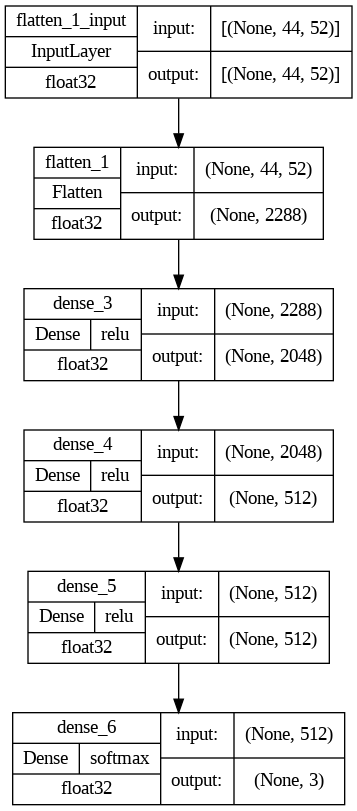

In [8]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=False,
)

In [12]:
optimizer = Adam(learning_rate = 0.005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [13]:
history = model.fit(x_train_scaled, y_train_encoded, epochs=75, batch_size=32, validation_split = 0.2)

Epoch 1/75
166/166 [==============================] - 1s 6ms/step - loss: 0.6981 - accuracy: 0.6884 - val_loss: 0.4466 - val_accuracy: 0.8468
Epoch 2/75
166/166 [==============================] - 1s 5ms/step - loss: 0.3788 - accuracy: 0.8522 - val_loss: 0.2827 - val_accuracy: 0.8974
Epoch 3/75
166/166 [==============================] - 1s 5ms/step - loss: 0.2426 - accuracy: 0.9088 - val_loss: 0.3364 - val_accuracy: 0.8657
Epoch 4/75
166/166 [==============================] - 1s 8ms/step - loss: 0.1896 - accuracy: 0.9304 - val_loss: 0.4019 - val_accuracy: 0.8528
Epoch 5/75
166/166 [==============================] - 2s 9ms/step - loss: 0.1548 - accuracy: 0.9439 - val_loss: 0.4160 - val_accuracy: 0.8868
Epoch 6/75
166/166 [==============================] - 2s 10ms/step - loss: 0.0933 - accuracy: 0.9653 - val_loss: 0.1954 - val_accuracy: 0.9351
Epoch 7/75
166/166 [==============================] - 2s 13ms/step - loss: 0.0694 - accuracy: 0.9758 - val_loss: 0.2241 - val_accuracy: 0.9389
Epoc

In [14]:
x_test_scaled = x_test.astype('float32') / x_test.max()
y_test = y_test - 1
y_test_encoded = to_categorical(y_test, num_classes=clasess)

score = model.evaluate(x_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')
print(y_test_encoded.shape)

Test loss: 0.39474770426750183
Test accuracy: 97.10144996643066 %
(1656, 3)


In [15]:
x_test_pred_scaled = x_test_pred.astype('float32') / x_test_pred.max()


pred_val = model.predict([x_test_pred_scaled])

df = pd.DataFrame(pred_val)

row_numb = df.shape[0]

pred_numbs = np.argmax(pred_val, axis=1)
pred_numbs_res = pred_numbs.reshape ((row_numb,1))


print(row_numb)

pred_numbs_res = pred_numbs_res + 1
print(pred_numbs_res)

df = pd.DataFrame(pred_numbs_res)
df.columns = ["target"]
df.to_csv('filename.csv') 
#files.download('filename.csv')



111/111 [==============================] - 1s 3ms/step
3549
[[2]
 [2]
 [1]
 ...
 [1]
 [1]
 [1]]


In [16]:
from google.colab import files


files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

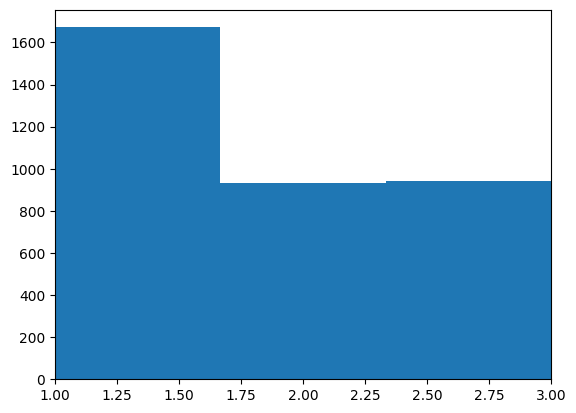

In [17]:
plt.figure()
plt.hist(pred_numbs_res, bins=3)
plt.xlim([1,3])
plt.show()

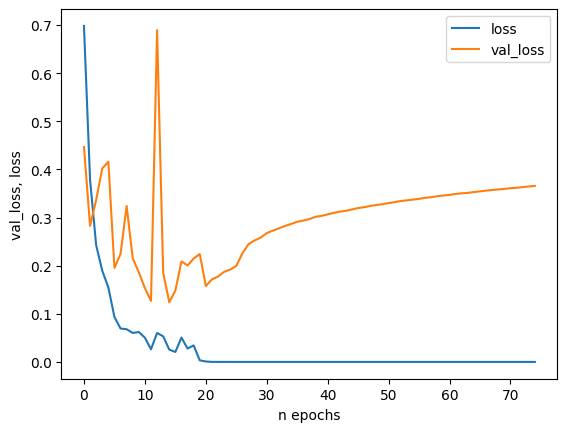

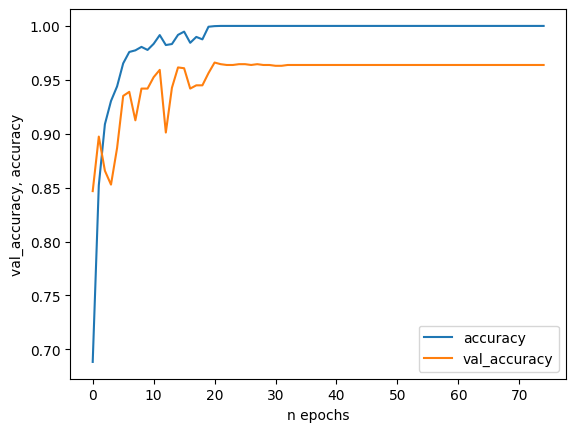

In [18]:
plt.figure()
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(loc="upper right")
plt.xlabel('n epochs')
plt.ylabel('val_loss, loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend(loc="lower right")
plt.xlabel('n epochs')
plt.ylabel('val_accuracy, accuracy')
plt.show()